```
Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         09/28/2018
Name:         Goodwin Chen
Worked with:  Druce Vertes, Matt Ahlborg
```

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Challenge 1

In [205]:
turnstile_0922_df = pd.read_csv('turnstile_180922.txt')
turnstile_0915_df = pd.read_csv('turnstile_180915.txt')
turnstile_0908_df = pd.read_csv('turnstile_180908.txt')
turnstile_0901_df = pd.read_csv('turnstile_180901.txt')


In [206]:
turnstile_df = pd.concat([turnstile_0901_df, turnstile_0908_df, turnstile_0915_df, turnstile_0922_df])
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [207]:
# format the column names to remove whitespace
turnstile_df.columns = [column.strip() for column in turnstile_df.columns]
turnstile_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Challenge 2

In [209]:
turnstile_df['DATETIME'] = pd.to_datetime(turnstile_df['DATE'] + ' ' + turnstile_df['TIME'], format="%m/%d/%Y %H:%M:%S")

In [210]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,2018-08-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,2018-08-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,2018-08-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,2018-08-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,2018-08-25 16:00:00


## Challenge 3

counts are for every 4 hours

In [211]:
#group by c/a, unit, scp, station, datetime
# check to see if these combos are unique
gb_turnstile_date = (turnstile_df
                     .sort_values(by='DATETIME')
                     .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
                    )
(gb_turnstile_date
 .ENTRIES
 .count()
 .reset_index()
 .sort_values('ENTRIES', ascending=False)
 .head()
)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
42902,A060,R001,00-00-01,WHITEHALL S-FRY,2018-09-14 05:00:00,2
42727,A060,R001,00-00-00,WHITEHALL S-FRY,2018-09-14 05:00:00,2
0,A002,R051,02-00-00,59 ST,2018-08-25 00:00:00,1
526911,R143,R032,02-03-02,TIMES SQ-42 ST,2018-09-21 08:00:00,1
526913,R143,R032,02-03-02,TIMES SQ-42 ST,2018-09-21 16:00:00,1


In [212]:
# 2 duplicates on 09/14, let's check them

mask1 = ((turnstile_df["C/A"] == "A060") & 
(turnstile_df["UNIT"] == "R001") & 
#(turnstile_df["SCP"] == "00-00-01") & 
(turnstile_df["STATION"] == "WHITEHALL S-FRY") &
(turnstile_df["DATETIME"]== pd.Timestamp('2018-09-14 05:00:00')))

turnstile_df[mask1]

# seems like these 2 lines are unnecessary let's drop them

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
10652,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,3612847,2401282,2018-09-14 05:00:00
10653,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,RECOVR AUD,3612845,2401282,2018-09-14 05:00:00
10695,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,2969337,1965665,2018-09-14 05:00:00
10696,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,RECOVR AUD,2969335,1965665,2018-09-14 05:00:00
10738,A060,R001,00-00-02,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,309982,247123,2018-09-14 05:00:00
10780,A060,R001,00-00-03,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,2404894,237048,2018-09-14 05:00:00
10822,A060,R001,00-00-04,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,435948,463939,2018-09-14 05:00:00
10864,A060,R001,00-00-05,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,1994044,2598926,2018-09-14 05:00:00
10906,A060,R001,00-00-06,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,89320,128978,2018-09-14 05:00:00
10948,A060,R001,00-00-07,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,3117099,2777379,2018-09-14 05:00:00


In [213]:
turnstile_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
turnstile_df.drop_duplicates(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [214]:
# check again to make sure all combos are unique
(turnstile_df
 .sort_values(by='DATETIME')
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
 .ENTRIES
 .count()
 .reset_index()
 .sort_values('ENTRIES', ascending=False)
 .head()
)

# all good, no more dupes

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-08-25 00:00:00,1
526981,R143,R032,02-03-03,TIMES SQ-42 ST,2018-09-05 00:00:00,1
526911,R143,R032,02-03-02,TIMES SQ-42 ST,2018-09-21 08:00:00,1
526912,R143,R032,02-03-02,TIMES SQ-42 ST,2018-09-21 12:00:00,1
526913,R143,R032,02-03-02,TIMES SQ-42 ST,2018-09-21 16:00:00,1


In [215]:
# Find first entry count and exit count each day
turnstile_daily = (turnstile_df
                   .sort_values('DATETIME')
                   .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE",\
                                  "LINENAME", "DIVISION", "DESC"],as_index=False)[['ENTRIES', 'EXITS']]
                   .first()
                  )

In [216]:
turnstile_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,08/25/2018,NQR456W,BMT,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,08/26/2018,NQR456W,BMT,REGULAR,6736683,2283460
2,A002,R051,02-00-00,59 ST,08/27/2018,NQR456W,BMT,REGULAR,6737136,2283656
3,A002,R051,02-00-00,59 ST,08/28/2018,NQR456W,BMT,REGULAR,6738430,2284121
4,A002,R051,02-00-00,59 ST,08/29/2018,NQR456W,BMT,REGULAR,6739804,2284508


In [217]:
turnstile_daily[['PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS']] = \
(turnstile_daily
 .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DIVISION", "DESC"])['DATE', 'ENTRIES', 'EXITS']
 .apply(lambda grp: grp.shift(1))
)

In [218]:
turnstile_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,08/25/2018,NQR456W,BMT,REGULAR,6736067,2283184,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/26/2018,NQR456W,BMT,REGULAR,6736683,2283460,08/25/2018,6736067.0,2283184.0
2,A002,R051,02-00-00,59 ST,08/27/2018,NQR456W,BMT,REGULAR,6737136,2283656,08/26/2018,6736683.0,2283460.0
3,A002,R051,02-00-00,59 ST,08/28/2018,NQR456W,BMT,REGULAR,6738430,2284121,08/27/2018,6737136.0,2283656.0
4,A002,R051,02-00-00,59 ST,08/29/2018,NQR456W,BMT,REGULAR,6739804,2284508,08/28/2018,6738430.0,2284121.0


In [219]:
turnstile_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
132954,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/17/2018,R,RIT,REGULAR,5554,348,09/16/2018,5554.0,348.0
132955,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/18/2018,R,RIT,REGULAR,5554,348,09/17/2018,5554.0,348.0
132956,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/19/2018,R,RIT,REGULAR,5554,348,09/18/2018,5554.0,348.0
132957,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2018,R,RIT,REGULAR,5554,348,09/19/2018,5554.0,348.0
132958,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2018,R,RIT,REGULAR,5554,348,09/20/2018,5554.0,348.0


In [220]:
#drop the rows for the earliest date
turnstile_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

#turn columns from floats to ints
turnstile_daily[['PREV_ENTRIES', 'PREV_EXITS']] = turnstile_daily[['PREV_ENTRIES', 'PREV_EXITS']].astype('int64')

In [221]:
#examine turnstiles where prev day entries and exits are greater than today's
turnstile_daily[turnstile_daily.ENTRIES < turnstile_daily.PREV_ENTRIES].head()

#looks like some turnstiles are going in reverse

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
626,A007,R079,01-06-00,5 AV/59 ST,09/04/2018,NQRW,BMT,REGULAR,458806,35,09/03/2018,3408576,6968742
961,A011,R080,01-00-00,57 ST-7 AV,08/26/2018,NQRW,BMT,REGULAR,885883727,490993904,08/25/2018,885883893,490996537
962,A011,R080,01-00-00,57 ST-7 AV,08/27/2018,NQRW,BMT,REGULAR,885883595,490991708,08/26/2018,885883727,490993904
963,A011,R080,01-00-00,57 ST-7 AV,08/28/2018,NQRW,BMT,REGULAR,885883250,490987201,08/27/2018,885883595,490991708
964,A011,R080,01-00-00,57 ST-7 AV,08/29/2018,NQRW,BMT,REGULAR,885882937,490982364,08/28/2018,885883250,490987201


In [222]:
turnstile_daily[turnstile_daily.EXITS < turnstile_daily.PREV_EXITS].head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
626,A007,R079,01-06-00,5 AV/59 ST,09/04/2018,NQRW,BMT,REGULAR,458806,35,09/03/2018,3408576,6968742
961,A011,R080,01-00-00,57 ST-7 AV,08/26/2018,NQRW,BMT,REGULAR,885883727,490993904,08/25/2018,885883893,490996537
962,A011,R080,01-00-00,57 ST-7 AV,08/27/2018,NQRW,BMT,REGULAR,885883595,490991708,08/26/2018,885883727,490993904
963,A011,R080,01-00-00,57 ST-7 AV,08/28/2018,NQRW,BMT,REGULAR,885883250,490987201,08/27/2018,885883595,490991708
964,A011,R080,01-00-00,57 ST-7 AV,08/29/2018,NQRW,BMT,REGULAR,885882937,490982364,08/28/2018,885883250,490987201


In [223]:
# examine how many turnstiles exhibit this behavior
(turnstile_daily[(turnstile_daily.ENTRIES < turnstile_daily.PREV_ENTRIES) |\
                 (turnstile_daily.EXITS < turnstile_daily.PREV_EXITS)]
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])
 .size()
)

C/A    UNIT  SCP       STATION        
A007   R079  01-06-00  5 AV/59 ST          1
A011   R080  01-00-00  57 ST-7 AV         27
             01-00-03  57 ST-7 AV         27
A025   R023  01-03-01  34 ST-HERALD SQ    27
             01-03-02  34 ST-HERALD SQ    27
A042   R086  01-00-04  PRINCE ST           1
A049   R088  02-05-00  CORTLANDT ST       22
A066   R118  00-00-00  CANAL ST           27
A069   R044  01-06-01  CHAMBERS ST        26
B012   R196  00-00-00  PROSPECT PARK      27
B018   R184  00-00-00  CORTELYOU RD        1
B020   R263  00-05-01  AVENUE H            1
B024   R211  00-05-01  KINGS HWY           3
C021   R212  00-00-02  59 ST              27
D011   R394  01-06-00  BAY PKWY           25
             01-06-01  BAY PKWY           25
H003   R163  01-00-02  6 AV               27
H019   R294  00-00-00  MORGAN AV           1
H023   R236  00-06-00  DEKALB AV          27
J034   R007  00-00-01  104 ST             25
             00-00-02  104 ST             27
JFK02  R535  01-

In [224]:
# make a function that can compute daily entries and daily exits for a row
# if turnstile goes in reverse, it's still useful, just negate the count
# if turnstile counter exceeds some threshold, it probably got reset so take the min of yest and today for best guess

def get_daily_counts(row, threshold, colname):
    count = abs(row[colname] - row['PREV_'+colname])
    if count > threshold:
        #print(row[colname], row['PREV_'+colname])
        min_entries = min(row[colname], row['PREV_'+colname])
        count = min_entries if (min_entries <= threshold) else 0
    return count

# test the function and view printout
# print statement above and below lines commented out but uncomment for testing

# turnstile_daily.apply(get_daily_counts, axis=1, threshold=400000, colname='ENTRIES')

# turnstile_daily.apply(get_daily_counts, axis=1, threshold=400000, colname='EXITS')

In [225]:
# create new columns for daily entries and exits
turnstile_daily['DAILY_ENTRIES'] = turnstile_daily.apply(get_daily_counts, axis=1, threshold=400000, colname='ENTRIES')
turnstile_daily['DAILY_EXITS'] = turnstile_daily.apply(get_daily_counts, axis=1, threshold=400000, colname='EXITS')

In [226]:
# dropping columns not of interest to free up memory
turnstile_daily = turnstile_daily.drop(columns=['DIVISION', 'DESC', 'DATE', \
                                                'PREV_ENTRIES', 'PREV_EXITS', 'ENTRIES', 'EXITS'], errors='ignore')

#renaming prev_date to date, since the the real date corresponds to prev_date
turnstile_daily.rename(columns={'PREV_DATE':'DATE'}, inplace=True)

In [227]:
#add column corresponding to day of week
turnstile_daily['WEEKDAY'] = turnstile_daily['DATE'].apply(lambda datestring: pd.to_datetime(datestring).weekday())

In [228]:
turnstile_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,WEEKDAY
1,A002,R051,02-00-00,59 ST,NQR456W,08/25/2018,616,276,5
2,A002,R051,02-00-00,59 ST,NQR456W,08/26/2018,453,196,6
3,A002,R051,02-00-00,59 ST,NQR456W,08/27/2018,1294,465,0
4,A002,R051,02-00-00,59 ST,NQR456W,08/28/2018,1374,387,1
5,A002,R051,02-00-00,59 ST,NQR456W,08/29/2018,1261,456,2


## Challenge 4

('A002', 'R051', '02-00-00', '59 ST', 'NQR456W')


([<matplotlib.axis.XTick at 0x7f03ef736438>,
 <a list of 6 Text xticklabel objects>)

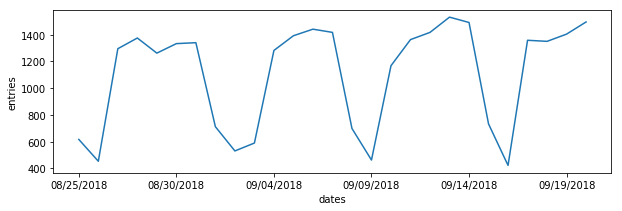

In [234]:
#choose first turnstile in our dataframe
multi_indexed_df = turnstile_daily.set_index(turnstile_daily.columns[0:5].tolist())
dates, counts = (multi_indexed_df.loc[multi_indexed_df.index[0]]['DATE'], 
                 multi_indexed_df.loc[multi_indexed_df.index[0]]['DAILY_ENTRIES']
                )
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('dates')
plt.ylabel('entries')
plt.xticks(dates[::5])

## Challenge 5

In [237]:
#group by c/a, unit, station, date, and then sum over entries
ca_unit_station_date_df= (turnstile_daily
                          .groupby(['C/A', 'UNIT', 'STATION', 'DATE'])['DAILY_ENTRIES']
                          .sum()
                          .to_frame()
                         )
ca_unit_station_date_df.head()
                          

DAILY_ENTRIES
C/A  UNIT STATION DATE                     
A002 R051 59 ST   08/25/2018           7244
                  08/26/2018           5573
                  08/27/2018          11891
                  08/28/2018          12191
                  08/29/2018          12388

## Challenge 6

In [239]:
# group by station, date and sum over entries
station_date_df= (turnstile_daily
                          .groupby(['STATION', 'DATE'])['DAILY_ENTRIES']
                          .sum()
                          .to_frame()
                         )
station_date_df.head()

DAILY_ENTRIES
STATION DATE                     
1 AV    08/25/2018          14533
        08/26/2018          12019
        08/27/2018          17354
        08/28/2018          17946
        08/29/2018          18479

## Challenge 7

([<matplotlib.axis.XTick at 0x7f03edcad518>,
 <a list of 6 Text xticklabel objects>)

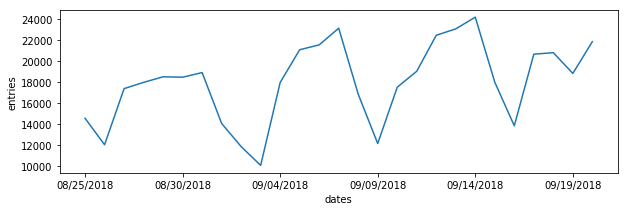

In [248]:
#plot for 1 AV station
dates = station_date_df.reset_index('DATE').loc['1 AV']['DATE']
counts = station_date_df.reset_index('DATE').loc['1 AV']['DAILY_ENTRIES']
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('dates')
plt.ylabel('entries')
plt.xticks(dates[::5])

## Challenge 8

Text(0,0.5,'entries')

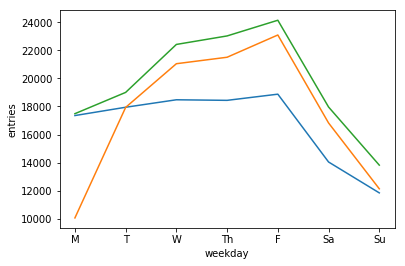

In [273]:
week_count_lists = []

#work with 1 AV station again
start = 2 #this is the first monday row in our dataframe
first_ave_df = station_date_df.reset_index('DATE').loc['1 AV']
for i in range(3): #get 3 weeks
    week_count_lists.append(first_ave_df.iloc[start+7*i:start+7*i+7])
    
for i in range(3):
    plt.plot(week_count_lists[i].reset_index()['DAILY_ENTRIES'])
plt.xlabel('weekday')
plt.xticks(np.arange(7), ('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
plt.ylabel('entries')

## Challenge 9

In [286]:
#use previous station_date_df, expand out, groupby stations again and sum over entries
(station_date_df
 .reset_index('STATION')
 .groupby('STATION').sum()
 .sort_values('DAILY_ENTRIES', ascending=False)
 .head(10)
)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,3770031
GRD CNTRL-42 ST,3248910
34 ST-HERALD SQ,2863366
14 ST-UNION SQ,2441212
42 ST-PORT AUTH,2403617
TIMES SQ-42 ST,2383636
23 ST,2354548
FULTON ST,2188881
CANAL ST,1834946


## Challenge 10

Text(0,0.5,'number of stations')

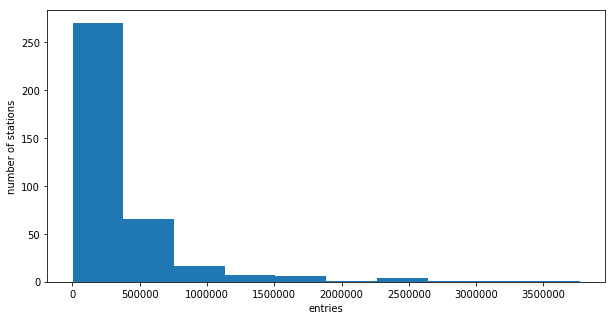

In [294]:
#create histogram of ridership count per station
total_ridership_counts = (station_date_df
 .reset_index('STATION')
 .groupby('STATION').sum()
 .sort_values('DAILY_ENTRIES', ascending=False)
 .DAILY_ENTRIES
)

plt.figure(figsize=(10,5))
plt.hist(total_ridership_counts)
plt.xlabel('entries')
plt.ylabel('number of stations')

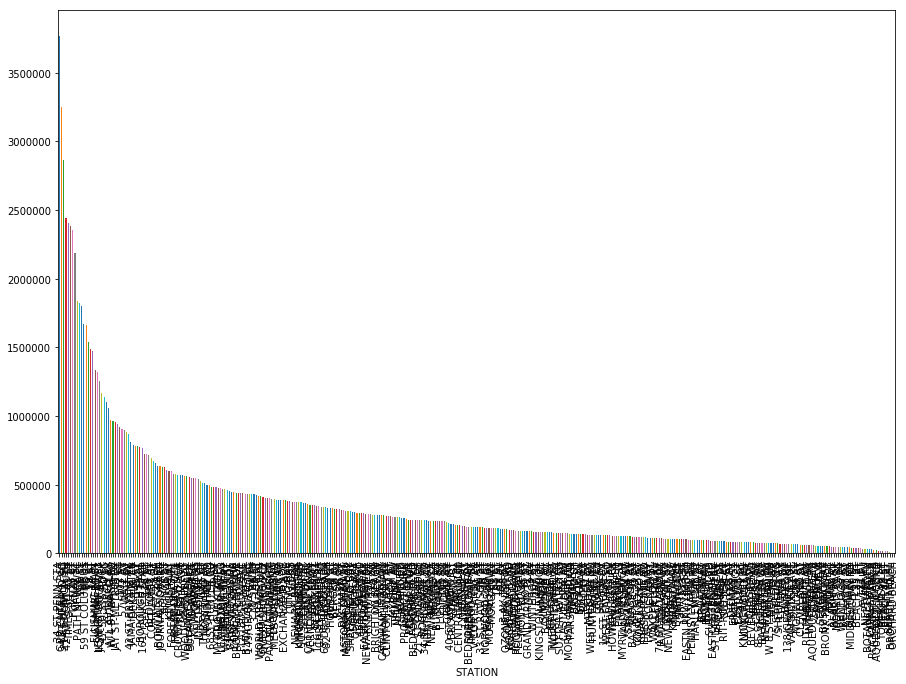

In [297]:
#create bar plot
plt.figure(figsize=(15,10))
total_ridership_counts.plot.bar()